In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Data= pd.read_csv("US_Updated.csv")
US_df = pd.DataFrame(Data)
US_df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200729,56,4394906,49430539,3840.0,57306.0,302057.0,10531.0,13744.0,2776.0,...,2020-07-29T00:00:00Z,53829285,53825445,53825445,1418,2913,773657,66211,839868,a2e1d4a308f87fa1c4938a8f20bc81a26295b8e7
1,20200728,56,4328695,48656882,3600.0,57091.0,299144.0,10463.0,13559.0,2752.0,...,2020-07-28T00:00:00Z,52989177,52985577,52985577,1121,4672,679736,53507,733243,10729af9f291bbb18e37d56f0bc31ff802f09672
2,20200727,56,4275188,47977146,3398.0,59023.0,294472.0,10328.0,13412.0,2720.0,...,2020-07-27T00:00:00Z,52255732,52252334,52252334,1059,1690,705706,55134,760840,021bea33ea5ddba5408c2a928ad900ae036a25dc
3,20200726,56,4220054,47271440,3361.0,58614.0,292782.0,10353.0,13343.0,2723.0,...,2020-07-26T00:00:00Z,51494855,51491494,51491494,558,1435,794098,61713,855811,820426c4c5479c7a0f8974e68aa7016f2082a93e
4,20200725,56,4158341,46477342,3377.0,59227.0,291347.0,10380.0,13279.0,2729.0,...,2020-07-25T00:00:00Z,50639060,50635683,50635683,1037,1992,732176,65413,797589,ea28b353271e8d21ff5f3b189169c0d974de8b29


In [3]:
#Split the date into different columns by Months,Day & Year to organize our data by months 
New = US_df.date.astype(str).str.extractall("(?P<Year>\d{4})(?P<Month>\d{2})(?P<Date>\d{2})")
Months = pd.DataFrame(New)
Months.reset_index(inplace=True)
Months = Months[["Year","Month","Date"]]
Months.head()

,Year,Month,Date
0,2020,07,29
1,2020,07,28
2,2020,07,27
3,2020,07,26
4,2020,07,25


In [4]:
#Created new columns in the data frame and added the split data into it.
US_df["Year"] = Months["Year"]
US_df["Month"] = Months["Month"]
US_df["Day"] = Months["Date"]
US_df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,Year,Month,Day
0,20200729,56,4394906,49430539,3840.0,57306.0,302057.0,10531.0,13744.0,2776.0,...,53825445,1418,2913,773657,66211,839868,a2e1d4a308f87fa1c4938a8f20bc81a26295b8e7,2020,07,29
1,20200728,56,4328695,48656882,3600.0,57091.0,299144.0,10463.0,13559.0,2752.0,...,52985577,1121,4672,679736,53507,733243,10729af9f291bbb18e37d56f0bc31ff802f09672,2020,07,28
2,20200727,56,4275188,47977146,3398.0,59023.0,294472.0,10328.0,13412.0,2720.0,...,52252334,1059,1690,705706,55134,760840,021bea33ea5ddba5408c2a928ad900ae036a25dc,2020,07,27
3,20200726,56,4220054,47271440,3361.0,58614.0,292782.0,10353.0,13343.0,2723.0,...,51491494,558,1435,794098,61713,855811,820426c4c5479c7a0f8974e68aa7016f2082a93e,2020,07,26
4,20200725,56,4158341,46477342,3377.0,59227.0,291347.0,10380.0,13279.0,2729.0,...,50635683,1037,1992,732176,65413,797589,ea28b353271e8d21ff5f3b189169c0d974de8b29,2020,07,25


In [5]:

US_df.fillna(0,inplace=True) #replaced null values with 0's
del US_df["date"]
del US_df["Year"]

In [6]:
US_df

,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,Month,Day
0,56,4394906,49430539,3840.0,57306.0,302057.0,10531.0,13744.0,2776.0,1400.0,...,53825445,53825445,1418,2913,773657,66211,839868,a2e1d4a308f87fa1c4938a8f20bc81a26295b8e7,07,29
1,56,4328695,48656882,3600.0,57091.0,299144.0,10463.0,13559.0,2752.0,1372.0,...,52985577,52985577,1121,4672,679736,53507,733243,10729af9f291bbb18e37d56f0bc31ff802f09672,07,28
2,56,4275188,47977146,3398.0,59023.0,294472.0,10328.0,13412.0,2720.0,1356.0,...,52252334,52252334,1059,1690,705706,55134,760840,021bea33ea5ddba5408c2a928ad900ae036a25dc,07,27
3,56,4220054,47271440,3361.0,58614.0,292782.0,10353.0,13343.0,2723.0,1336.0,...,51491494,51491494,558,1435,794098,61713,855811,820426c4c5479c7a0f8974e68aa7016f2082a93e,07,26
4,56,4158341,46477342,3377.0,59227.0,291347.0,10380.0,13279.0,2729.0,1300.0,...,50635683,50635683,1037,1992,732176,65413,797589,ea28b353271e8d21ff5f3b189169c0d974de8b29,07,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,0,0,0,0,0,e1cf59ab48e1cf367c4a6798a508a23d9d36bd18,01,26
186,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,0,0,0,0,0,bef2a1d5f2a13491e0e0369bbd46c10cdd12973b,01,25
187,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,0,0,0,0,0,bfffe76fc0b7cf11efe8aecd3cc7b22598d77d61,01,24
188,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,0,0,0,0,0,cee36ebf3174bf1df0daa36e1e8088a157406fad,01,23


In [7]:
#Grouped the Data Frame by month and perfoormed a max on it to get the current value for each month.
#for reference the data set has cumulative values for each date .That means current date will have the total values updated.
Months_Data = US_df.groupby("Month")   

Months_New = Months_Data.max()
Months_New

,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,Day
Month,,,,,,,,,,,,,,,,,,,,,
01,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,0,0,0,1,1,e960a515d1779fa15049c5935ab0574e595a87c8,31
02,1,299,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,316,316,316,2,0,17,40,41,ffe41d6947d93d86a6f85189d9d0461c93f93d5e,29
03,56,199786,897282,65709.0,18082.0,23725.0,3487.0,236.0,507.0,0.0,...,1156586,1097068,1097068,861,3906,96564,24694,118461,f9727e4e13ad82cb735a5e52a102c5b76eeab777,31
04,56,1075454,5241537,62097.0,59940.0,123786.0,15130.0,4192.0,6168.0,373.0,...,6319766,6316991,6316991,2692,5086,294567,35901,323483,ffc76ba56f6fee5d593b32fd7a30fb23ccd5e30e,30
05,56,1795541,15257057,4084.0,55122.0,210464.0,12904.0,8445.0,7070.0,704.0,...,17055868,17052598,17052598,2740,17320,463707,33056,487229,fad223dd51972ad80e235e30e6352a515bafc64b,31
06,56,2627744,29682807,4054.0,35248.0,242408.0,7591.0,10669.0,3950.0,1008.0,...,32312983,32310551,32310551,2501,2796,607649,47462,646824,fcead0ec38a2854ec2a22f86682f8012898b1965,30
07,56,4394906,49430539,3840.0,59885.0,302057.0,10531.0,13744.0,2776.0,1400.0,...,53829285,53825445,53825445,1418,5141,854645,77233,929838,ea28b353271e8d21ff5f3b189169c0d974de8b29,29


In [8]:
Months_New.reset_index(inplace=True)

In [9]:
Months_New

,Month,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,Day
0,01,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,0,0,0,1,1,e960a515d1779fa15049c5935ab0574e595a87c8,31
1,02,1,299,17,0.0,0.0,0.0,0.0,0.0,0.0,...,316,316,316,2,0,17,40,41,ffe41d6947d93d86a6f85189d9d0461c93f93d5e,29
2,03,56,199786,897282,65709.0,18082.0,23725.0,3487.0,236.0,507.0,...,1156586,1097068,1097068,861,3906,96564,24694,118461,f9727e4e13ad82cb735a5e52a102c5b76eeab777,31
3,04,56,1075454,5241537,62097.0,59940.0,123786.0,15130.0,4192.0,6168.0,...,6319766,6316991,6316991,2692,5086,294567,35901,323483,ffc76ba56f6fee5d593b32fd7a30fb23ccd5e30e,30
4,05,56,1795541,15257057,4084.0,55122.0,210464.0,12904.0,8445.0,7070.0,...,17055868,17052598,17052598,2740,17320,463707,33056,487229,fad223dd51972ad80e235e30e6352a515bafc64b,31
5,06,56,2627744,29682807,4054.0,35248.0,242408.0,7591.0,10669.0,3950.0,...,32312983,32310551,32310551,2501,2796,607649,47462,646824,fcead0ec38a2854ec2a22f86682f8012898b1965,30
6,07,56,4394906,49430539,3840.0,59885.0,302057.0,10531.0,13744.0,2776.0,...,53829285,53825445,53825445,1418,5141,854645,77233,929838,ea28b353271e8d21ff5f3b189169c0d974de8b29,29


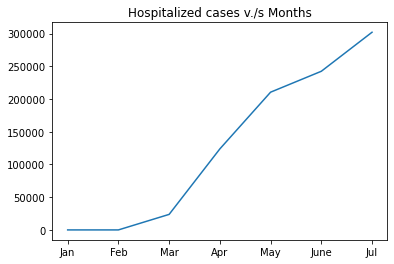

In [10]:
plt.plot(Months_New["Month"],Months_New["hospitalizedCumulative"])
plt.title("Hospitalized cases v./s Months")
length = np.arange(7)
tick_locations=[value for value in length]
plt.xticks(ticks = tick_locations,labels=["Jan","Feb","Mar","Apr","May","June","Jul"])
plt.savefig("US DATA IMAGES/plot1.png")

### Analysis:
#### This plot shows the rise in hospitalized U.S cases from the month of Feb-jul 2020..
#### This maybe due to the fact that the Corona's first case was reported in the end of february.
#### The hospitalizations and cases spiked during the month of March-May,2020.
#### From May-June the slope is a bit less but is continously on a rise

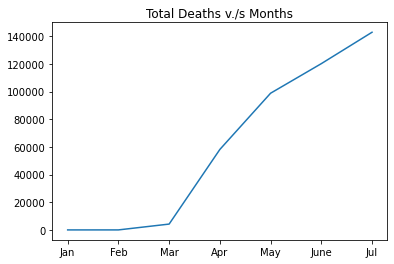

In [11]:
plt.plot(Months_New["Month"],Months_New["death"])
plt.title("Total Deaths v./s Months")
length = np.arange(7)
tick_locations=[value for value in length]
plt.xticks(ticks = tick_locations,labels=["Jan","Feb","Mar","Apr","May","June","Jul"])
plt.savefig("US DATA IMAGES/plot2.png")

### Analysis:
##### This chart shows the rise in no. of Deaths over the 7 months.


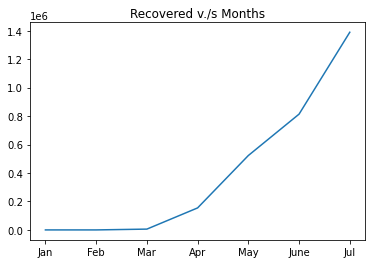

In [12]:
plt.plot(Months_New["Month"],Months_New["recovered"])
plt.title("Recovered v./s Months")
length = np.arange(7)
tick_locations=[value for value in length]
plt.xticks(ticks = tick_locations,labels=["Jan","Feb","Mar","Apr","May","June","Jul"])
plt.savefig("US DATA IMAGES/plot3.png")

## Analysis:
##### This chart shows that the Recovery rate saw a constant rise during the months of April-June,2020 and is continously increasing and is at a peak in july.

<Figure size 432x720 with 0 Axes>

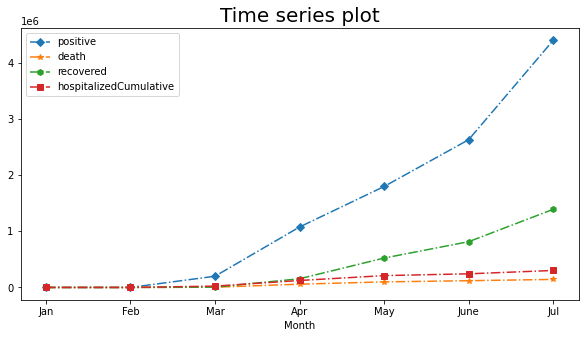

In [21]:
plt.figure(figsize=(6,10))
Months_New.plot(x="Month",y=["positive","death","recovered","hospitalizedCumulative"],figsize=(10,5),linestyle="dashdot",style=["D","*","h","s"],solid_capstyle="projecting")
length = np.arange(7)
tick_locations=[value for value in length]
plt.xticks(ticks = tick_locations,labels=["Jan","Feb","Mar","Apr","May","June","Jul"])
plt.title("Time series plot",fontsize=20,fontweight=20)
plt.savefig("US DATA IMAGES/final.png")
plt.show()

## Final Analysis:
#### This time series plot shows that there is a major difference between the no. of Positive cases and Recovered.
#### This may be due to the fact that the no.of tests that are being done are more now than before the pandemic spread over the entire country.
#### Whereas, the Recovery rates are still less because the medicine has not been approved for it yet.
#### As per the current data,No. of Deaths reported are less than the no.of Recovered this could be due to the mutation of virus or better understanding of how to deal with the virus.
